<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Milestone4_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso,  RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import time

from warnings import simplefilter
simplefilter('ignore', category=UserWarning) # ignore 'fit without feature names' warning
simplefilter('ignore', category=FutureWarning) # ignore XGBoost warning about is_categorical_dtype

<h1>Data Importing<h1>
<ul>
<li>full_df contains everything, including the one-hot-encoded/labeled variables and the response all together
<li>pred contains only the predictors
<li>resp contains the response variable Operational Energy
<ul>
<p>The steps below are to roughly prepare the data for usage, getting rid of the index columns and verifying the data is correct<p>

In [2]:
full_df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Full_data.csv")
pred = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Predictors_data.csv")
resp = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Response_data.csv")

In [3]:
#Dropping index columns
full_df = full_df.drop('Unnamed: 0', axis=1)
pred = pred.drop('Unnamed: 0', axis=1)
resp = resp.drop('Unnamed: 0', axis=1)

In [4]:
full_df.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal,OE
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,1,0,0,0,0,0,0,1,141.615293
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,1,0,0,0,0,0,0,1,127.674846
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,1,0,0,0,255.768779
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,1,0,0,0,0,1,0,0,0,126.355396
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,0,0,0,0,0,0,1,0,0,124.733609


In [5]:
pred.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,0,1,0,0,0,0,0,0,1
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,0,1,0,0,0,0,0,0,1
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,0,1,0,0,0
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,0,1,0,0,0,0,1,0,0,0
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,1,0,0,0,0,0,0,1,0,0


In [6]:
resp.head(5)

,OE
0,141.615293
1,127.674846
2,255.768779
3,126.355396
4,124.733609


<hr>
<hr>
<h1> Start your Models here! <h1>
<hr>
<hr>

In [7]:
# Separate predictors and response
X, y = pred, resp
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# I will do polynomial regression with Lasso 

In [9]:
X_train.shape

(26000, 34)

In [10]:
X_train.columns

Index(['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio',
       'Packaged Single Zone - gas boiler', 'Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump', 'Courthouse',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed', 'Metal'],
      dtype='object')

In [11]:
#dopping one of each categorical predictors
X_train_used = X_train.drop(columns=["Packaged Single Zone - gas boiler" , "Courthouse", "Metal"])

In [12]:
X_test_used = X_test.drop(columns=["Packaged Single Zone - gas boiler" , "Courthouse", "Metal"])

In [13]:
X_train_used.shape, X_test_used.shape

((26000, 31), (6500, 31))

In [14]:
X_train_used.columns

Index(['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio',
       'Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed'],
      dtype='object')

In [15]:
X_train_used.head(1)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Large Hotel,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed
4825,293,3.6,0.0,5.81,5.56,0.85,0.85,0.85,0.85,0.38,...,0,0,0,1,0,0,0,0,1,0


In [16]:
#extracting quatitative variables
X_train_used_quant = X_train_used.drop(columns=['Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed'])

In [17]:
X_test_used_quant = X_test_used.drop(columns=['Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed'])

In [18]:
X_train_used_quant.shape , X_test_used_quant.shape

((26000, 14), (6500, 14))

In [19]:
X_train_used_cat = X_train_used.drop(columns=['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio'])

In [20]:
X_test_used_cat = X_test_used.drop(columns=['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio'])

In [21]:
X_train_used_cat.shape , X_test_used_cat.shape

((26000, 17), (6500, 17))

In [22]:
#Scaling quantitative preditcors

In [23]:
scaler = StandardScaler().fit(X_train_used_quant)
X_train_quant_sc = scaler.transform(X_train_used_quant)
X_test_quant_sc = scaler.transform(X_test_used_quant)

In [24]:
X_train_quant_sc.shape , X_test_quant_sc.shape

((26000, 14), (6500, 14))

In [25]:
# Finding the best hyper-parameter alpha

In [26]:
# I will test the alpha values by convention tested in class
alpha_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

In [27]:
# I will test for polynomial to the 30th degree to find the alpha, 
# again based on convention of what we did in class
max_degree = 5

In [28]:
# Setting those up, the way we have done in class
include_bias = False
fit_intercept = True
max_iter = 100

In [29]:
poly = PolynomialFeatures(max_degree, include_bias=include_bias).fit(X_train_quant_sc)

In [30]:
X_train_quant_sc_poly = poly.transform(X_train_quant_sc)
X_train_quant_sc_poly.shape

(26000, 11627)

In [31]:
X_test_quant_sc_poly = poly.transform(X_test_quant_sc)
X_test_quant_sc_poly.shape

(6500, 11627)

In [32]:
X_train_used_cat.shape

(26000, 17)

In [33]:
X_train_quant_sc_poly = pd.DataFrame(X_train_quant_sc_poly)
X_train_used_cat = pd.DataFrame(X_train_used_cat, columns = X_test_used_cat.columns)

In [34]:
X_train_used_cat.head()

,Packaged Single Zone - heat pump,Variable Air Volume air-cooled chiller - gas boiler,Variable Air Volume air-cooled chiller - heat pump,Variable Air Volume chiller with central - gas boiler,Variable Air Volume chiller with central - heat pump,Full Service Restaurant,Hospital,Large Hotel,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed
4825,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
23440,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
11879,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
11758,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5937,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [35]:
X_train_quant_sc_poly.shape

(26000, 11627)

In [36]:
X_train_quant_sc_poly.columns = X_train_quant_sc_poly.columns.astype(str)

In [37]:
X_train_used_cat.columns = X_train_used_cat.columns.astype(str)

In [38]:
X_train_used_cat.shape

(26000, 17)

In [39]:
X_train_used_cat_reset = X_train_used_cat.reset_index(drop=True)
X_train_quant_sc_poly_reset = X_train_quant_sc_poly.reset_index(drop=True)

In [40]:
X_train_quant_sc_poly_cat = pd.concat([X_train_used_cat_reset, X_train_quant_sc_poly_reset], axis=1)

In [41]:
X_train_quant_sc_poly_cat.shape

(26000, 11644)

In [42]:
lasso = LassoCV(alphas=alpha_list, cv=10, fit_intercept=fit_intercept, max_iter=10)
lasso.fit(X_train_quant_sc_poly_cat, y_train);
lassoCV_val_mses_mean = lasso.mse_path_.mean(axis=1)
lassoCV_val_mses_std = lasso.mse_path_.std(axis=1)
best_alpha = lasso.alpha_

In [43]:
best_alpha

0.01

In [44]:
# Showing the mean validation MSE values for each regularization parameter alpha , identifying the best alpha 

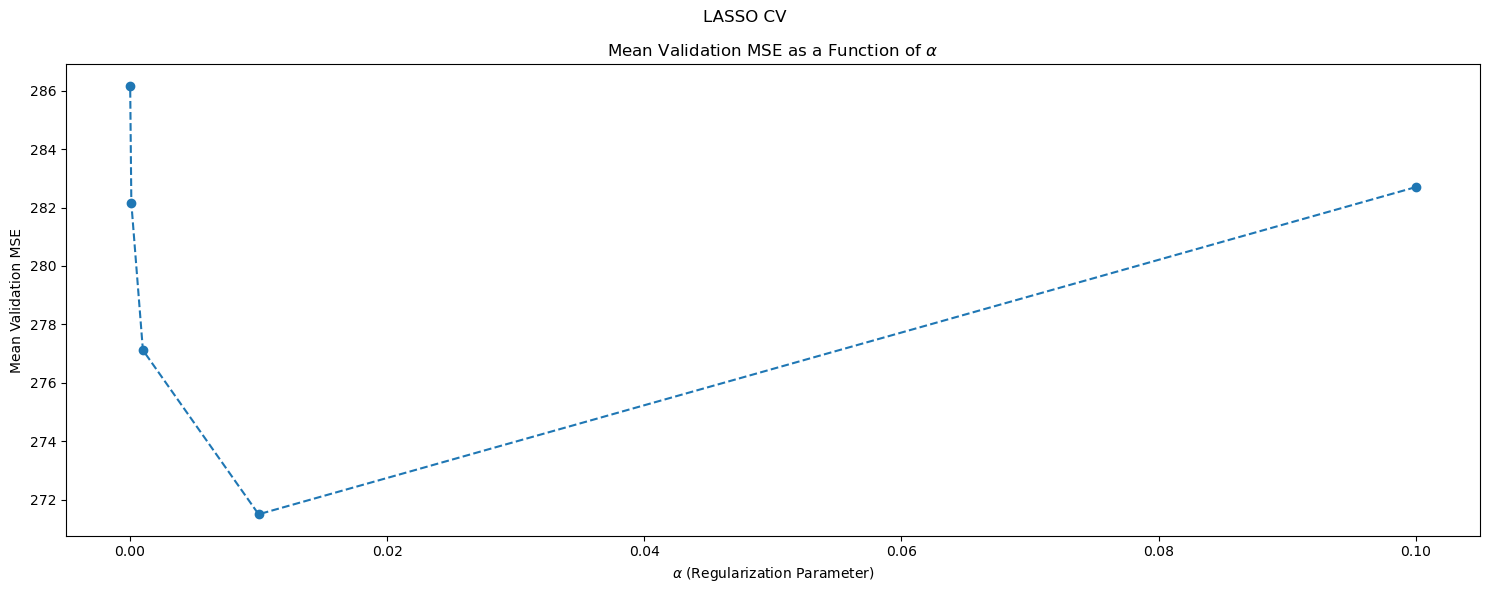

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
axes.plot(lasso.alphas_, lassoCV_val_mses_mean, 'o--')
axes.set(
    xlabel=r'$\alpha$ (Regularization Parameter)',
    ylabel='Mean Validation MSE',
    title=r'Mean Validation MSE as a Function of $\alpha$',
)
plt.suptitle("LASSO CV")
plt.tight_layout()
plt.show()


In [46]:
y_train_df = pd.DataFrame(y_train)

In [47]:
X_train_quant_sc = pd.DataFrame(X_train_quant_sc, columns = X_train_used_quant.columns)

In [48]:
X_train_quant_sc.head()

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,WindowR [m^2-K/W],numFloor,AspectRatio,VolumeToFacadeRatio
0,1.088787,0.825661,-0.392304,-0.079627,0.801900,1.260001,1.260247,1.259521,1.258402,0.702575,0.200791,-0.544257,1.331518,0.395801
1,1.146264,1.546578,-0.392304,0.573531,0.801900,1.335460,1.335758,1.335066,1.333921,0.990877,1.806627,2.613379,0.703869,-0.027066
2,0.102100,-1.622739,4.256687,0.283923,0.295233,-0.815102,-0.514270,-1.346758,-1.460288,0.990877,1.806627,1.034561,-0.522573,-0.396007
3,0.178736,-1.622739,1.447666,-0.800566,-0.993954,-1.494227,-1.495917,-1.157897,-0.780616,-1.171387,-0.702491,-0.807393,-0.096926,-0.819147
4,0.054202,0.812058,-0.392304,1.503974,0.700567,-0.022790,-0.891827,-0.553542,-0.818375,0.702575,0.000062,-0.807393,0.631725,-0.009625


In [49]:
X_train_used_cat = X_train_used_cat.reset_index(drop=True)
X_train_quant_sc = X_train_quant_sc.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

In [50]:
y_train_df.head()

,OE
0,152.328363
1,297.979379
2,92.739612
3,61.615198
4,190.840377


In [51]:
df_train = pd.concat([X_train_used_cat, X_train_quant_sc , y_train_df], axis = 1)
df_train.shape

(26000, 32)

In [52]:
df_train.head(1)

,Packaged Single Zone - heat pump,Variable Air Volume air-cooled chiller - gas boiler,Variable Air Volume air-cooled chiller - heat pump,Variable Air Volume chiller with central - gas boiler,Variable Air Volume chiller with central - heat pump,Full Service Restaurant,Hospital,Large Hotel,Medium Office,Midrise Apartment,...,WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,WindowR [m^2-K/W],numFloor,AspectRatio,VolumeToFacadeRatio,OE
0,0,0,1,0,0,0,0,0,0,0,...,1.260001,1.260247,1.259521,1.258402,0.702575,0.200791,-0.544257,1.331518,0.395801,152.328363


In [53]:
X_train_quant_sc.columns

Index(['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio'],
      dtype='object')

In [54]:
X_train_used_cat.columns

Index(['Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed'],
      dtype='object')

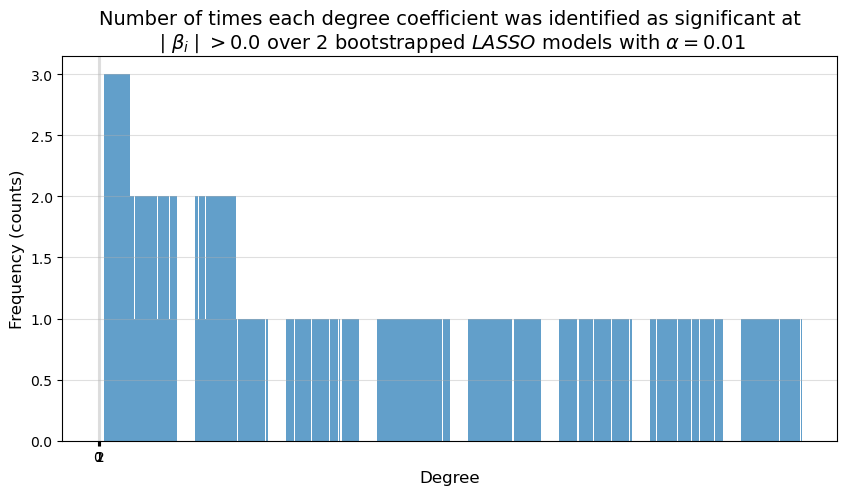

In [55]:
# Fitting the lasso model
numboot = 2
max_degree = [1, 2, 3]

significant_degrees = {}

# Perform bootstraps
for d in max_degree:
    df_boot = df_train.sample(frac=1, replace=True)
    x_train_quant_boot = df_boot[['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio']]
    x_poly_train_boot = PolynomialFeatures(
        d, include_bias=include_bias
    ).fit_transform(x_train_quant_boot)
    x_train_cat_boot = df_boot[['Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed']]
    x_poly_train_boot = pd.DataFrame(x_poly_train_boot)
    x_train_cat_boot = pd.DataFrame(x_train_cat_boot)
    x_poly_train_boot = x_poly_train_boot.reset_index(drop=True)
    x_train_cat_boot = x_train_cat_boot.reset_index(drop=True)
    x_train_boot = pd.concat([x_poly_train_boot, x_train_cat_boot], axis=1) 
    x_train_boot.columns = x_train_boot.columns.astype(str)
    y_train_boot = df_boot.OE

    lasso = Lasso(
        fit_intercept=True,
        max_iter=10,
        alpha=best_alpha,
    )
    lasso.fit(x_train_boot, y_train_boot)
    
    if fit_intercept:
        coefficients = [lasso.intercept_, *lasso.coef_]
    else:
        coefficients = lasso.coef_

    for i in np.where(np.abs(coefficients) > 0.0)[0]:
        if i not in significant_degrees:
            significant_degrees[i] = 1
        else:
            significant_degrees[i] += 1

fig, ax = plt.subplots(figsize=(10, 5))

lists = sorted(significant_degrees.items())
x, y = zip(*lists)

ax.bar(x, y, alpha=0.7)
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("Frequency (counts)", fontsize=12)
ax.set_xticks(range(len(max_degree)))
ax.set_title(
    "Number of times each degree coefficient was identified as significant at\n"
    f"$\mid\\beta_i\mid > 0.0$ over {numboot} bootstrapped $LASSO$ models "
    f"with $\\alpha={best_alpha}$",
    fontsize=14,
)
plt.grid(":", alpha=0.4)
plt.show()

In [56]:
significant_degrees

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 3,
 5: 3,
 6: 3,
 7: 3,
 8: 3,
 9: 3,
 10: 3,
 11: 3,
 12: 3,
 13: 3,
 14: 3,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 3,
 22: 3,
 23: 3,
 24: 3,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 3,
 30: 3,
 31: 3,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 1,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 1,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 2,
 65: 2,
 66: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 1,
 72: 2,
 73: 2,
 74: 2,
 75: 2,
 76: 2,
 77: 2,
 78: 2,
 79: 2,
 80: 2,
 81: 2,
 82: 2,
 83: 2,
 84: 2,
 85: 2,
 86: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 1,
 94: 2,
 95: 2,
 96: 2,
 97: 2,
 98: 2,
 99: 1,
 100: 2,
 101: 2,
 102: 2,
 103: 2,
 104: 2,
 105: 2,
 106: 1,
 107: 2,
 108: 2,
 109: 2,
 110: 2,
 111: 2,
 112: 2,
 113: 2,
 114: 2,
 115: 2,
 116: 2,
 117: 2,
 118: 2,
 119: 2,
 120: 2,
 121: 2,
 122: 2,
 12